# Name : Parth Ajay Zaveri

# The Sparks Foundation

# Data Science and Business Analytics Intern

# Task 1: Prediction using Supervised Machine Learning

# Predict the percentage of an student based on the no. of study hours.

In [2]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score
%matplotlib inline

In [3]:
df = pd.read_csv('data.txt')

In [4]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# Visualizing dataset

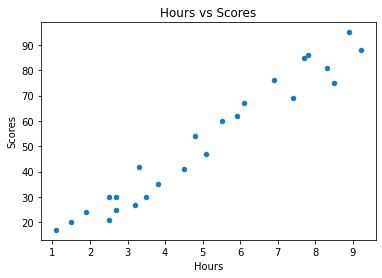

In [6]:
df.plot.scatter('Hours','Scores',style='o')
plt.title('Hours vs Scores')
plt.show()

# we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

In [7]:
df.count()

Hours     25
Scores    25
dtype: int64

Text(0, 0.5, 'Count')

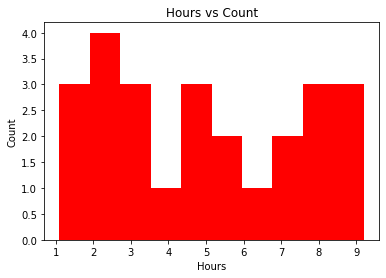

In [8]:
plt.hist(df['Hours'],color='red',rwidth=1)
plt.title('Hours vs Count')
plt.xlabel('Hours')
plt.ylabel('Count')

# The above graph demonstrates count of hours present in the dataset

In [9]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [10]:
X = df[['Hours']].values
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [11]:
y = df['Scores'].values  
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

# Training the algorithm

In [13]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

# Making Predictions

In [14]:
prediction = model.predict(X_test)
prediction

array([60.55206779, 89.62290386, 27.60512025, 34.38831533, 46.98567763,
       21.79095303, 92.52998747, 40.20248254])

# Comparing the predictions and actual values

In [15]:
cdf = pd.DataFrame({'Actual': y_test, 'Prediction': prediction})
cdf

,Actual,Prediction
0,62,60.552068
1,95,89.622904
2,30,27.605120
3,27,34.388315
4,41,46.985678
5,24,21.790953
6,88,92.529987
7,35,40.202483


# Visualizing Actual values and Predicted values

<function matplotlib.pyplot.show(close=None, block=None)>

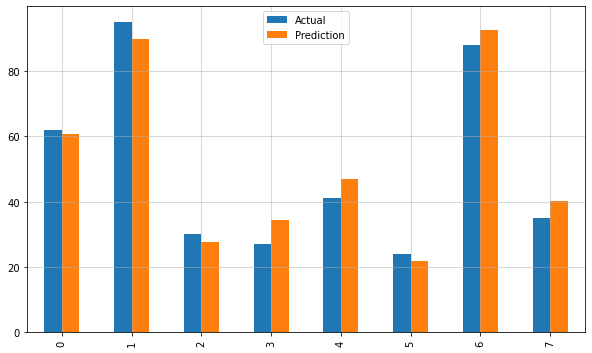

In [16]:
cdf.plot(kind='bar',figsize=(10,6),)
plt.grid(which='major', linestyle='-',linewidth='0.5')
plt.grid(which='minor',linestyle=':',linewidth='0.5')
plt.show

# What will be the predicted score if a student studies for 9.25hrs/day

In [17]:
hours = [[9.25]]
own_pred = model.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.01450140239899


In [18]:
model.coef_,model.intercept_

(array([9.69027869]), 3.379423524497234)

# Evaluating the model

In [19]:
rmse = np.sqrt(mean_squared_error(y_test, prediction))
rmse

4.738501335580138

In [20]:
r2_score(y_test,prediction)

0.9674794678630655

In [21]:
mae = metrics.mean_absolute_error(y_test,prediction)

In [22]:
mae

4.316927254281789

# Plotting Regression Line

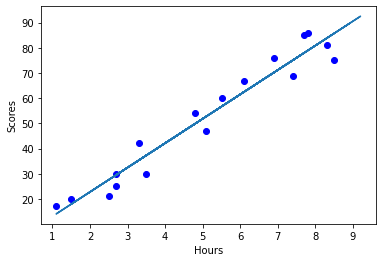

In [23]:
line = model.coef_*X+model.intercept_
plt.scatter(X_train,y_train,color='blue')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.plot(X,line)
plt.show()